In [2]:
import pandas as pd

# Bibliotecas de geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

data.shape = (16430, 5)
ultimo_dia.shape = (1440, 5)


,time,s4
0,0.0,0.220
1,1.0,0.187
2,2.0,0.193
3,3.0,0.186
4,4.0,0.168
...,...,...
16425,16425.0,0.165
16426,16426.0,0.157
16427,16427.0,0.153
16428,16428.0,0.154


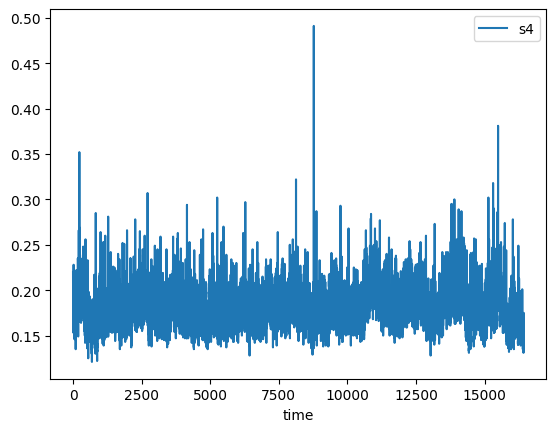

In [31]:
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', na_values=[' ', ''])

data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[data['time_utc']>='2018-09-04 14:10:00']
data = data[data[' svid'] == 131]
ultimo_dia = data.loc[data['time_utc']>='2018-09-15 00:00:00']
print(f'data.shape = {data.shape}')
print(f'ultimo_dia.shape = {ultimo_dia.shape}')
data['time_utc'] = data['time_utc'].apply(lambda x:  x.timestamp())
minimo = data['time_utc'].min()
data['time_utc'] = data['time_utc'].apply(lambda x: (x-minimo)/60)
data = data[['time_utc', ' s4']]
data.columns = ['time', 's4']
data['s4'] = data['s4'].astype(float)
data.reset_index(drop=True, inplace=True)
data.plot(x='time', y='s4')
data.interpolate('linear')

In [43]:
x = data.drop(["s4"], axis=1)
y = data["s4"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

train_x = x_train
train_y = y_train

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print("Atributos: Treino", x_train.shape, "Teste", x_test.shape)
print("Valores: Treino", y_train.shape, "Teste", y_test.shape)

Atributos: Treino (11501, 1) Teste (4929, 1)
Valores: Treino (11501,) Teste (4929,)


In [44]:
gbr = MLPRegressor( max_iter=400, random_state=42)
gbr.fit(x_train, y_train)

y_predict = gbr.predict(x_test)
mean_squared_error(y_predict, y_test)

0.0009787589991868029

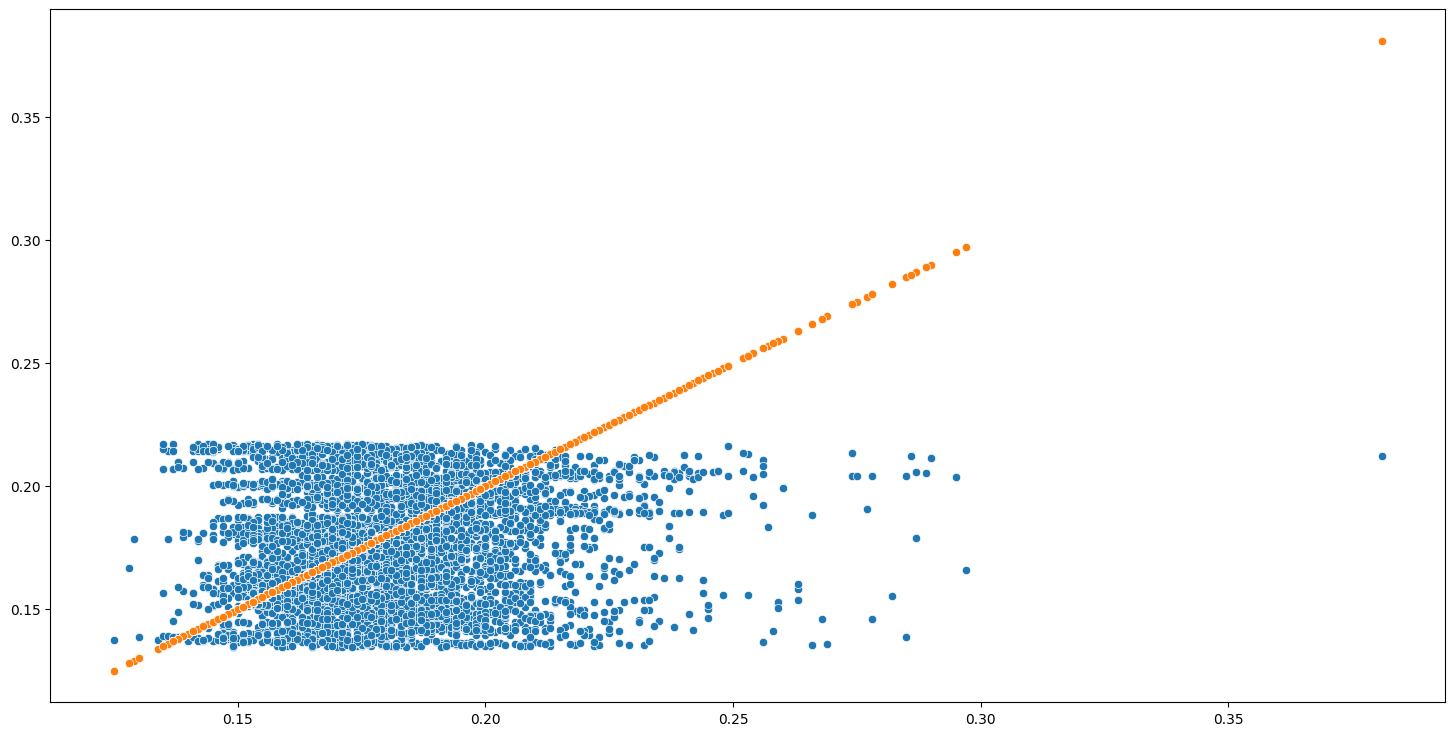

array([0.182, 0.153, 0.187, ..., 0.145, 0.175, 0.147])

In [45]:
plt.figure(figsize=(18, 9))

sns.scatterplot(x=y_test, y=y_predict)
sns.scatterplot(x=y_test, y=y_test)

# plt.savefig("gbr_scatter.svg", formatstr="svg")
plt.show()
y_train

In [48]:
from skopt import gp_minimize
from skopt.utils import use_named_args

# def fitness(params):
#     learning_rate = params[0]
#     n_estimators = params[1]
#     min_samples_split = params[2]
#     min_samples_leaf = params[3]

#     model_gbr = GradientBoostingRegressor(learning_rate=learning_rate,
#                                         n_estimators=n_estimators,
#                                         min_samples_split=min_samples_split.astype(int),
#                                         min_samples_leaf=min_samples_leaf.astype(int),
#                                         random_state=42)

#     model_gbr.fit(x_train, y_train)
#     gbr_predict = model_gbr.predict(x_test)
#     return mean_squared_error(y_test, gbr_predict)

space = [(1e-2, 1e-1), # learning_rate
         (1, 1000), # n_estimators
         (2, 100), # min_samples_split
         (1, 100)] # min_samples_leaf, # subsample, # max_features

# resultado_gp = gp_minimize(fitness, space, random_state=42, n_calls=20, n_random_starts=10, verbose=1)

# print(resultado_gp.x)
# print(resultado_gp.fun)



from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

param_distributions = {
   "hidden_layer_sizes": [(1,),(10,),(25,)], "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["rmsprop", "sgd", "adam"], "alpha": [0.001,0.001],
 }

# pipe_gbr = Pipeline(steps=[
# #    ("preprocessor", preprocessor),
#    ("classifier", GradientBoostingRegressor(random_state=42))
#  ])

gs_gbr = (GridSearchCV(estimator=MLPRegressor(max_iter=1200, random_state=42), param_grid=param_distributions, scoring='neg_mean_squared_error'))

gs_gbr = gs_gbr.fit(train_x, train_y)
gs_gbr.best_estimator_

/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:174: RuntimeWarning: invalid value encountered in add
  activations[i + 1] += self.intercepts_[i]
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:174: RuntimeWarning: invalid value encountered in add
  activations[i + 

MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=(25,),
             max_iter=1200, random_state=42)

0.0004814710317141899


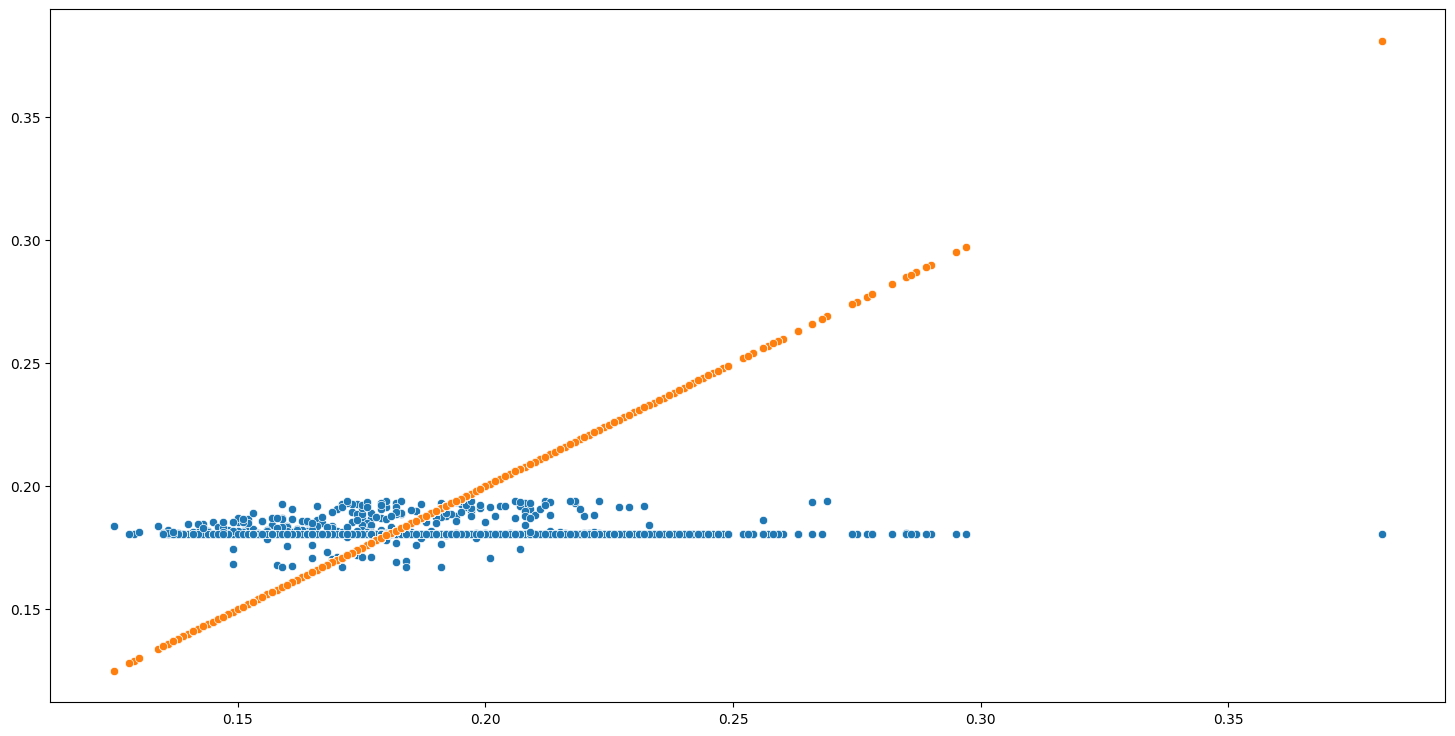

In [47]:
clf = MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=(25,),
             max_iter=400, random_state=42)

clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
mse = mean_squared_error(y_predict, y_test)
print(mse)

plt.figure(figsize=(18, 9))

sns.scatterplot(x=y_test, y=y_predict)
sns.scatterplot(x=y_test, y=y_test)

# plt.savefig("gbr_scatter.svg", formatstr="svg")
plt.show()